<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/Lab%201/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Business Understanding

## Forest Cover Type

This dataset looks at the ecological data on 4 areas from Roosevelt National Forest of northern Colorado. Sampling forest cover type for a 30x30 meter areas, determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. These areas have minimal human disturbance, in order to provide insight on ecological data over forest management.

As for primary major tree species in these areas:
### Neota 
- spruce/fir (type 1)


### Rawah and Comanche Peak
- lodgepole pine (type 2)
- spruce/fir and aspen (type 5)

### Cache la Poudre 
- Ponderosa pine (type 3)
- Douglas-fir (type 6)
- Cottonwood/willow (type 4)

### Acknowledgement
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University. (source: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset)

## Predictions
- This dataset can be leveraged to predict categorical values of trees, eliminating confounding factors of human interference, in order to predict cover type, based on elevation, slope, soil type, cover type, shadow coverage, and local topography (Using logistic regression or Random Forest).

- The insights from this data are useful for understanding the ecology of tree species in the areas sampled were pulled from (Roosevelt National Forest of north Colorado). Trees are an important part of a healthy ecosystem in earth, as they store carbon dioxide, which helps to slow global warming.

- Elevation can be predicted using this dataset, by leveraging a linear regression model.

In [ ]:
# Import packages

import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas.plotting
from pandas.plotting import scatter_matrix



In [ ]:
# upload files from computer to google colab

forest_cover_type = files.upload()

Saving covtype 3.csv to covtype 3.csv


In [ ]:
# read the files into a dataframe

forest_cover_type = pd.read_csv('covtype 3.csv') 

FileNotFoundError: ignored

In [ ]:
# read the files into a dataframe

print(forest_cover_type.shape)
forest_cover_type.head()

(581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Data Meaning 

Attributes:	

- 10 quantitative variables
  - Elevation (meters)
  - Aspect (azimuth)
  - Slope (degrees)
  - Horizontal Distance to Hydrology (meters)
  - Vertical Distance to Hydrology (meters)
  - Horizontal Distance to Roadways (meters)
  - Hill shade 9 am (0 to 255 index)
  - Hill shade noon (0 to 255 index)
  - Hill shade 3 pm (0 to 255 index)
  - Horizontal distance to fire points (meters)

- 4 binary wilderness areas 
  - Neota
  - Rawah
  - Comanche Peak
  - Cache la Poudre

- 7 Cover Types (Forest Cover Type designation)
  - 1: Spruce/Fir
  - 2: Lodgepole Pine
  - 3: Ponderosa Pine
  - 4: Cottonwood/Willow
  - 5: Aspen
  - 6: Douglas-fir
  - 7: Krummholz


- 40 binary soil type variables

	- 1: Cathedral family - Rock outcrop complex, extremely stony.
	- 2: Vanet - Ratake families complex, very stony.
	- 3: Haploborolis - Rock outcrop complex, rubbly.
	- 4: Ratake family - Rock outcrop complex, rubbly.
	- 5: Vanet family - Rock outcrop complex complex, rubbly.
	- 6: Vanet - Wetmore families - Rock outcrop complex, stony.
	- 7: Gothic family.
	- 8: Supervisor - Limber families complex.
	- 9: Troutville family, very stony.
	- 10: Bullwark - Catamount families - Rock outcrop complex, rubbly.
	- 11: Bullwark - Catamount families - Rock land complex, rubbly.
	- 12: Legault family - Rock land complex, stony.
	- 13: Catamount family - Rock land - Bullwark family complex, rubbly.
	- 14: Pachic Argiborolis - Aquolis complex.
	- 15: unspecified in the USFS Soil and ELU Survey.
	- 16: Cryaquolis - Cryoborolis complex.
	- 17: Gateview family - Cryaquolis complex.
	- 18: Rogert family, very stony.
	- 19: Typic Cryaquolis - Borohemists complex.
	- 20: Typic Cryaquepts - Typic Cryaquolls complex.
	- 21: Typic Cryaquolls - Leighcan family, till substratum complex.
	- 22: Leighcan family, till substratum, extremely bouldery.
	- 23: Leighcan family, till substratum - Typic Cryaquolls complex.
	- 24: Leighcan family, extremely stony.
	- 25: Leighcan family, warm, extremely stony.
	- 26: Granile - Catamount families complex, very stony.
	- 27: Leighcan family, warm - Rock outcrop complex, extremely stony.
	- 28: Leighcan family - Rock outcrop complex, extremely stony.
	- 29: Como - Legault families complex, extremely stony.
	- 30: Como family - Rock land - Legault family complex, extremely stony.
	- 31: Leighcan - Catamount families complex, extremely stony.
	- 32: Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
	- 33: Leighcan - Catamount families - Rock outcrop complex, extremely stony.
	- 34: Cryorthents - Rock land complex, extremely stony.
	- 35: Cryumbrepts - Rock outcrop - Cryaquepts complex.
	- 36: Bross family - Rock land - Cryumbrepts complex, extremely stony.
	- 37: Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
	- 38: Leighcan - Moran families - Cryaquolls complex, extremely stony.
	- 39: Moran family - Cryorthents - Leighcan family complex, extremely stony.
	- 40: Moran family - Cryorthents - Rock land complex, extremely stony.

In [ ]:

# make list of continuous variables
continuous_variables = ['Elevation', 
                        'Aspect', 
                        'Slope', 
                        'Horizontal_Distance_To_Hydrology', 
                        'Vertical_Distance_To_Hydrology',
                        'Horizontal_Distance_To_Roadways',
                        'Hillshade_9am','Hillshade_Noon',
                        'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points',
                        'Cover_Type']

# use list to make df
continuous_variables_df = forest_cover_type[continuous_variables]

# subset df to make binary categorical
# second number not inclusive
Wilderness_Area = forest_cover_type.iloc[:, 10:14]

#
Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)
Wilderness_Area


# subset df to make binary categorical
# second number not inclusive
Soil_Type = forest_cover_type.iloc[:, 14:54]

#
Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)
Soil_Type

# only keep the new column
Soil_Type = Soil_Type[['Soil_Type']]
Soil_Type

Wilderness_Area = Wilderness_Area[['Wilderness_Area']]
Wilderness_Area

<ipython-input-7-5eb1a4974397>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wilderness_Area['Wilderness_Area'] = Wilderness_Area.idxmax(axis = 1)
<ipython-input-7-5eb1a4974397>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Soil_Type['Soil_Type'] = Soil_Type.idxmax(axis = 1)


,Wilderness_Area
0,Wilderness_Area1
1,Wilderness_Area1
2,Wilderness_Area1
3,Wilderness_Area1
4,Wilderness_Area1
...,...
581007,Wilderness_Area3
581008,Wilderness_Area3
581009,Wilderness_Area3
581010,Wilderness_Area3


In [ ]:
# Add new columns to df
forest_cover_type['Soil_Type'] = Soil_Type
forest_cover_type['Wilderness_Area'] = Wilderness_Area

#replace numerical categories with string for ease of understanding
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].str.replace('Wilderness_Area1','Rawah')
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].str.replace('Wilderness_Area2','Neota')
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].str.replace('Wilderness_Area3','Comanche Peak')
forest_cover_type['Wilderness_Area'] = forest_cover_type['Wilderness_Area'].str.replace('Wilderness_Area4','Cache la Poudre')

forest_cover_type = forest_cover_type.astype({'Cover_Type':'string'})

forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('1','Spruce/Fir')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('2','Lodgepole Pine')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('3','Ponderosa Pine')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('4','Cottonwood/Willow')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('5','Aspen')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('6','Douglas-fir')
forest_cover_type['Cover_Type'] = forest_cover_type['Cover_Type'].str.replace('7','Krummholz')

# check to see if worked
forest_cover_type

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,Aspen,Soil_Type29,Rawah
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,Aspen,Soil_Type29,Rawah
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,Lodgepole Pine,Soil_Type12,Rawah
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,Lodgepole Pine,Soil_Type30,Rawah
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,Aspen,Soil_Type29,Rawah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,Ponderosa Pine,Soil_Type2,Comanche Peak
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,Ponderosa Pine,Soil_Type2,Comanche Peak
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,Ponderosa Pine,Soil_Type2,Comanche Peak
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,Ponderosa Pine,Soil_Type2,Comanche Peak


In [ ]:
# delete superfluous columns now that new columns are added
forest_cover_type.drop(forest_cover_type.iloc[:, 10:54], 
                       axis = 1, 
                       inplace = True)
forest_cover_type

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,Soil_Type29,Rawah
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,Soil_Type29,Rawah
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Soil_Type12,Rawah
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Soil_Type30,Rawah
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,Soil_Type29,Rawah
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,Ponderosa Pine,Soil_Type2,Comanche Peak
581008,2391,152,19,67,12,95,240,237,119,845,Ponderosa Pine,Soil_Type2,Comanche Peak
581009,2386,159,17,60,7,90,236,241,130,854,Ponderosa Pine,Soil_Type2,Comanche Peak
581010,2384,170,15,60,5,90,230,245,143,864,Ponderosa Pine,Soil_Type2,Comanche Peak


In [ ]:
# data type
print(forest_cover_type.info())
print('\n')
# basic summary stats
print(forest_cover_type.describe())
print('\n')
# count the nulls
print(forest_cover_type.isnull().sum())
print('\n')
# count the frequency of each outcome
print(forest_cover_type['Cover_Type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581012 non-null  int64 
 1   Aspect                              581012 non-null  int64 
 2   Slope                               581012 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64 
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64 
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64 
 6   Hillshade_9am                       581012 non-null  int64 
 7   Hillshade_Noon                      581012 non-null  int64 
 8   Hillshade_3pm                       581012 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64 
 10  Cover_Type                          581012 non-null  string
 11  Soil_Type                           581

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


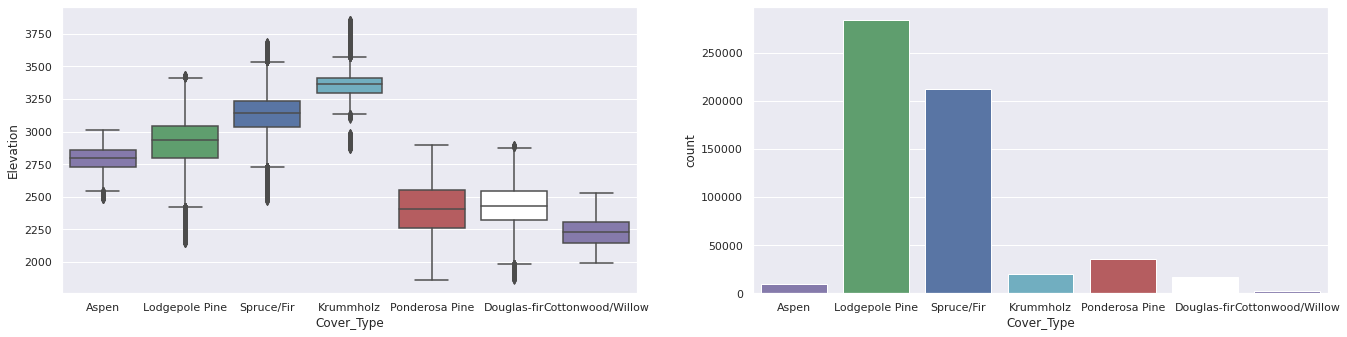

In [ ]:
sns.set(rc={'figure.figsize':(22.7,5.27)})

#side by side plot
fig, ax =plt.subplots(1,2)

# box plots for elevation vs cover type
sns.boxplot(x = 'Cover_Type', y = 'Elevation', data = forest_cover_type, ax=ax[0], palette=["m", "g", "b", "c", "r", "w", "m"])

# count plot for cover type
sns.countplot(forest_cover_type['Cover_Type'],  ax=ax[1], palette=["m", "g", "b", "c", "r", "w", "m"])
fig.show()

In [ ]:
#check for duplicates
bool_series = forest_cover_type.duplicated()
bool_series

0         False
1         False
2         False
3         False
4         False
          ...  
581007    False
581008    False
581009    False
581010    False
581011    False
Length: 581012, dtype: bool

## Data Quality
- There are no null values in this dataset
- We made adjustments to the numeric categorical columns for ease of use and understanding:
  - Soil type- from 40 to 1 column
  - Cover type- from 7 integer columns down to 1 column of a categorical string.
  - Wilderness area- from 4 integer columns down to 1 column of a categorical string

- While we saw some outliers in terms of elevation for some cover types, there was no indication that this was an error. For example, Krummholz is known as a high elevation cover type.

- Similarly, we found higher populations of Spruce/Fir in the dataset vs. other cover types, but this is expected:
"Spruce-fir is among the most extensive forest types in Colorado, covering approximately 4.6 million acres or 19 percent of the state’s forested lands." (https://csfs.colostate.edu/colorado-forests/forest-types/spruce-fir/)

- We leveraged the pandas .duplicated() function to check for duplicate values, and did not find any in the data.

## Simple Statistics 
- Tadd

In [ ]:
simpleStats = forest_cover_type.describe()
print(simpleStats)

#Messy plot that needs cleaned up
simpleStats.reset_index(inplace=True)
num_col = forest_cover_type._get_numeric_data().columns
simpleStats = simpleStats[simpleStats['index'] != 'count']

fig, axes = plt.subplots(4,3,sharex=True)
sns.lineplot(x='index',y='Elevation',data=simpleStats,ax=axes[0,0])
sns.lineplot(x='index',y='Aspect',data=simpleStats,ax=axes[0,1])
sns.lineplot(x='index',y='Slope',data=simpleStats,ax=axes[0,2])
sns.lineplot(x='index',y='Horizontal_Distance_To_Hydrology',data=simpleStats,ax=axes[1,0])
sns.lineplot(x='index',y='Vertical_Distance_To_Hydrology',data=simpleStats,ax=axes[1,1])
sns.lineplot(x='index',y='Horizontal_Distance_To_Roadways',data=simpleStats,ax=axes[1,2])
sns.lineplot(x='index',y='Hillshade_9am',data=simpleStats,ax=axes[2,0])
sns.lineplot(x='index',y='Hillshade_Noon',data=simpleStats,ax=axes[2,1])
sns.lineplot(x='index',y='Hillshade_3pm',data=simpleStats,ax=axes[2,2])
sns.lineplot(x='index',y='Horizontal_Distance_To_Fire_Points',data=simpleStats,ax=axes[3,0])
fig.show()

Need to do write up and make plots readable and/or choose only plots that are interesting -Tadd

## Visualize Attributes
- Everyone
- Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting).
- Important: Interpret the implications for each visualization.
- Explain for each attribute why the chosen visualization is appropriate

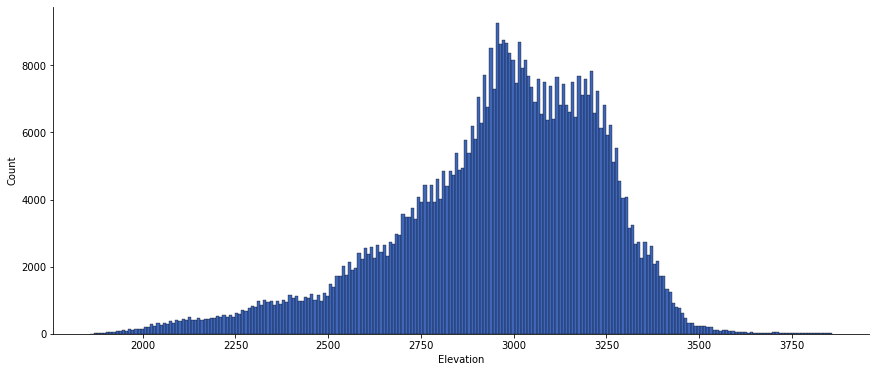

In [ ]:
# distribution plot for elevation in SMU Blue

sns.displot(forest_cover_type['Elevation'], color = '#0033A0', height=5.27, aspect=12.27/5.27)

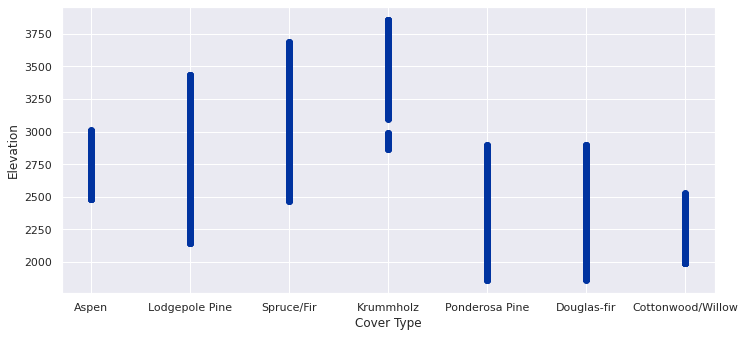

In [ ]:
# scatter plot of above
sns.set(rc={'figure.figsize':(11.7,5.27)})

plt.scatter(forest_cover_type['Cover_Type'], forest_cover_type['Elevation'], color = '#0033A0')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.show()

In [ ]:
aspectDF = forest_cover_type[['Aspect','Cover_Type']].copy()
cardBins = [0,45,135,225,315,360]
cardLabels = ['North','East','South','West','North']
aspectDF['Cardinal'] = pd.cut(aspectDF['Aspect'],bins=cardBins,labels=cardLabels,ordered=False)
sns.displot(x='Aspect',hue='Cardinal',data=aspectDF).set(title='Slope aspect of plot in degrees')

Placeholder for text about aspect - Tadd

In [ ]:
sns.histplot(x='Slope',bins=22,data=forest_cover_type,color='firebrick').set(title='Distribution of plot slopes in degrees')

Placeholder for text about slope - Tadd

In [ ]:
#scatter matrix
axs = scatter_matrix(forest_cover_type, diagonal='kde')

def wrap(txt, width=8):
    '''helper function to wrap text for long labels'''
    import textwrap
    return '\n'.join(textwrap.wrap(txt, width))

for ax in axs[:,0]: # the left boundary
    ax.grid('off', axis='both')
    ax.set_ylabel(wrap(ax.get_ylabel()), rotation=0, va='center', labelpad=20)
    ax.set_yticks([])

for ax in axs[-1,:]: # the lower boundary
    ax.grid('off', axis='both')
    ax.set_xlabel(wrap(ax.get_xlabel()), rotation=90)
    ax.set_xticks([])

NameError: ignored

Looking at a scatter matrix of the dataset, we can see that xxx. 



In [ ]:
# Function for Hist Viz
# taken from a previous project from undergrad

def histogram_and_boxplot(df_column):
    f, (ax_box, ax_hist) = plt.subplots(2, 
                                        sharex = True, 
                                        gridspec_kw = {"height_ratios": (.15, .85)})
    sns.set(style = "ticks")
    flierprops = dict(marker = 'o', 
                      markersize = 4, 
                      markerfacecolor = 'none', 
                      linestyle = 'none', 
                      markeredgecolor = 'blue')
    text  = 'Std dev: ' + str(round(df_column.std(), 2)) + '\n'
    text += 'Mean: ' + str(round(df_column.mean(), 2)) + '\n'
    text += 'Median: ' + str(round(df_column.median(), 2)) + '\n'
    text += 'Skew: ' + str(round(df_column.skew(), 2)) + '\n'
    text += 'Kurt: ' + str(round(df_column.kurt(), 2))
    plt.text(0.95, 
             0.5, 
             text, 
             fontsize = 10, 
             transform = plt.gcf().transFigure)
    plt.axvline(df_column.median(), 
                color = 'k', 
                linestyle = 'dashed', 
                linewidth = 1)
    sns.boxplot(x = df_column, 
                ax = ax_box, 
                fliersize = 4, 
                width = 0.50, 
                linewidth = 1,
                flierprops = flierprops)
    sns.histplot(x = df_column, 
                 ax = ax_hist)
    ax_box.set(yticks = [])
    sns.despine(ax = ax_hist)   
    sns.despine(ax = ax_box)  
    plt.show()

In [ ]:
# use function to plot box and histogram for all contiuous variables
for col in continuous_variables_df.columns[:-1]:
    histogram_and_boxplot(continuous_variables_df[col])

We can see a variety of different structures and stats from the data from the above graphs. We can use this data for assumption purposes as well as genereal understanding of data gathering. We are able to view skewness and normality from the graphs. We can see the average number for the various features as well as the median. These will help us with future testing.

## Explore Joint Attributes
- Tadd and Milan

In [ ]:

# Correlation df
cormat = forest_cover_type.corr()
# Round to two decimals
round(cormat,2)

# Maybe try to subset this a little?
# heatmap of the correlations
sns.heatmap(cormat);

## Explore Attributes and Class

- Andrew

In [ ]:
aPlot = sns.violinplot(x='Cover_Type',y='Aspect',data=aspectDF)
aPlot.sex_xticklabels(aPlot.get_xticklabels(),rotation=45,horizontalalignment='right')
aPlot2 = sns.FacetGrid(aspectDF,col='Cover_Type',col_wrap=4)
aPlot2.map(sns.histplot,'cardinal',stat='percent')

Placeholder for aspect/cover type text - Tadd

In [ ]:
sns.displot(x='Slope',hue='Cover_Type',kind='kde',multiple='fill',data=forest_cover_type)

Place holder for slope/cover type text -Tadd

In [ ]:
# Taken from https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe

# Make a list of all of the columns in the df
cols = list(forest_cover_type.columns.values) 
# Remove Cover type from list
cols.pop(cols.index('Cover_Type')) 
# Create new dataframe with columns in the order you want
forest_cover_type = forest_cover_type[cols + ['Cover_Type']] 

In [ ]:
# Feature Importance Graph
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(X, y)
sort = rf.feature_importances_.argsort()
plt.barh(forest_cover_type.columns.values[sort], rf.feature_importances_[sort])
plt.xlabel('Feature Importance')
plt.show()

We can see from this graph the features with most importance. 'Elevation', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area' are the top five features in this dataset. The elevation feature shows that it is extremely important as compared to the other features.

The top five features will be used in further testing with regression techniques. THe question posed would have to be - why do you think these are so important? Especially the 'Horizontal_Distance_To_Fire_Points' feature? In our opinion, distance to fire points should not impact 'Cover_Type' that much. We are interested to conduct further testing and further research to identify reasonings for this particular feature.

In [ ]:
# Correlation df
cormat = forest_cover_type.corr()
# Round to two decimals
round(cormat, 2)

# Maybe try to subset this a little?
# heatmap of the correlations
sns.heatmap(cormat);

The correlation heatmap allows for easy visual recognition of which features are correlated with other features - specifically the 'Cover_Type' feature. This heatmap also shows the correlation as being positive or negative. This will help in future analysis and testing.

## New Features
- Kendall

## Exceptional Work
- Andrew and Kendall

In [ ]:
# https://realpython.com/logistic-regression-python/#logistic-regression-in-python

# Assign specific features to two different variables
X = forest_cover_type.iloc[:, 0:12]
y = forest_cover_type.iloc[:, 12]
# Build a logistic regression model
model = LogisticRegression(solver = 'liblinear', random_state = 0)
model = model.fit(X, y)

In [ ]:
model.classes_
# See the model results
print(model.predict_proba(X))
print(model.predict(X))
print(model.score(X, y))
print(confusion_matrix(y, model.predict(X)))

In [ ]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0, 1, 2, 3, 4, 5, 6))
ax.yaxis.set(ticks = (0, 1, 2, 3, 4, 5, 6))
ax.set_ylim(6.5, -0.5)
for i in range(7):
    for j in range(7):
        ax.text(j, 
                i, 
                cm[i, j], 
                ha = 'center', 
                va = 'center', 
                color = 'Green')
plt.show()

The model has good prediction cabailities in the first cover types - Spruce/Fir and Lodgepole Pine. That being said, it also incorrectly oredicts those two quite a bit. 

In [ ]:
# print the metrics used to evaluate the model
print(classification_report(y, model.predict(X)))

In [ ]:
# model with higher C value. default was c = 1
# A high value of C tells the model to give more weight to the training data. 
# A lower value of C will indicate the model to give complexity more weight at 
# the cost of fitting the data. Thus, a high Hyper Parameter value C indicates 
# that training data is more important and reflects the real world data, whereas 
# low value is just the opposite of this.

model = LogisticRegression(solver = 'liblinear', 
                           C = 10.0, 
                           random_state = 0)
model.fit(X, y)

# print the metrics used to evaluate the model
print(classification_report(y, model.predict(X)))

Do we need/want below??

In [ ]:
X = forest_cover_type.iloc[:, 0:55].values
y = forest_cover_type.iloc[:, 54].values

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


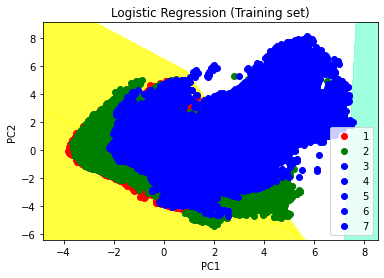

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# performing preprocessing part
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
# Below is taken from https://www.geeksforgeeks.org/principal-component-analysis-with-python/
explained_variance = pca.explained_variance_ratio_

from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
  
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
  
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
  
# show scatter plot
plt.show()